## Explatory Data Analysis

In [15]:
import sys
sys.path.append('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/')

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft
import numpy as np
from src.utils.loader import load_folder_data

import warnings
warnings.filterwarnings('ignore')


In [16]:
# Paths to your data folders
activity_folder = '/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/processed/I06AU_TRUE_EVENT'
non_activity_folder = '/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/processed/I06AU_NON_EVENT'

# Initialize empty dataframes
activity_data = load_folder_data(activity_folder, 1)       # Label '1' for activity
non_activity_data = load_folder_data(non_activity_folder, 0)  # Label '0' for non-activity

# Combine the datasets
combined_data = pd.concat([activity_data, non_activity_data], ignore_index=True)

In [18]:
# Initial Data Overview
print(combined_data.describe())

              I06H1         I06H2         I06H3         I06H4         I06H6  \
count  1.695955e+07  1.695955e+07  1.695945e+07  1.695955e+07  1.695955e+07   
mean  -1.665693e-03  2.000630e-03  2.189779e-03  1.840674e-03 -1.517357e-03   
std    1.288846e+02  1.535805e+02  2.185093e+02  1.795497e+02  1.218616e+02   
min   -4.885689e+03 -1.076065e+04 -8.201156e+03 -1.086238e+04 -4.589272e+03   
25%   -5.974142e+01 -6.711536e+01 -8.485163e+01 -7.545031e+01 -5.678590e+01   
50%   -1.500536e-02  1.891125e-02 -2.736358e-02 -8.856298e-03 -4.576049e-03   
75%    5.980984e+01  6.718571e+01  8.487854e+01  7.543533e+01  5.678979e+01   
max    5.718187e+03  8.880485e+03  1.004973e+04  9.281826e+03  5.556596e+03   

              I06H7         I06H8         label         I06H5  
count  1.695955e+07  1.695955e+07  1.695955e+07  3.755601e+06  
mean  -1.259452e-03 -1.532623e-04  4.970313e-01  1.489740e-03  
std    1.178385e+02  1.301268e+02  4.999912e-01  1.164644e+02  
min   -4.120573e+03 -5.123077e+0

In [19]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16959549 entries, 0 to 16959548
Data columns (total 10 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   I06H1      float64       
 2   I06H2      float64       
 3   I06H3      float64       
 4   I06H4      float64       
 5   I06H6      float64       
 6   I06H7      float64       
 7   I06H8      float64       
 8   label      int64         
 9   I06H5      float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 GB
None


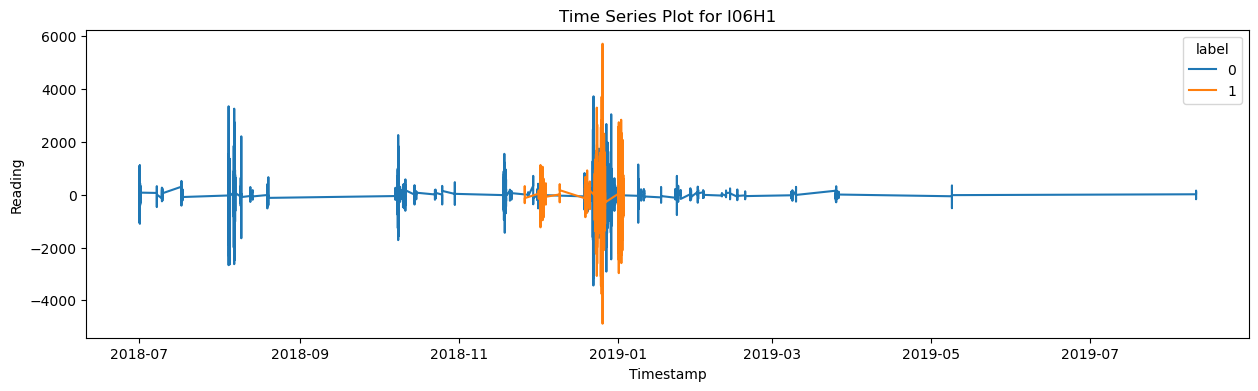

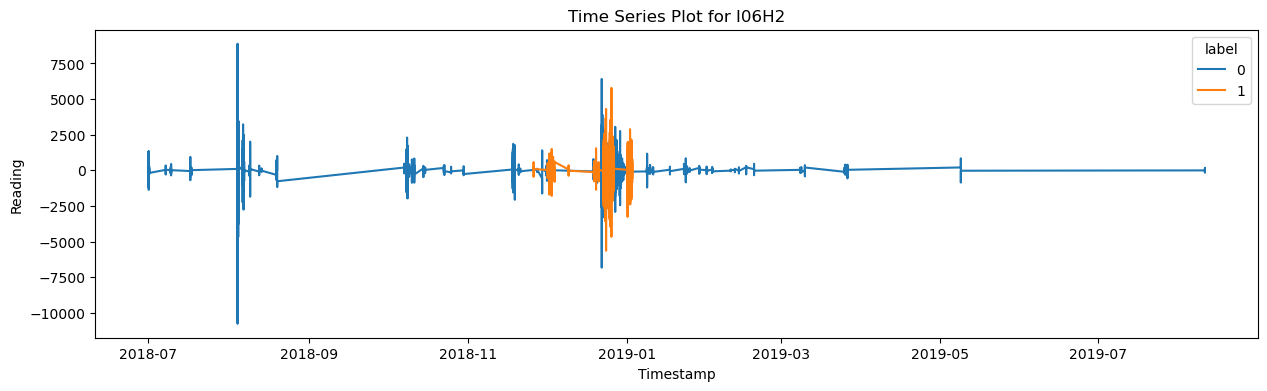

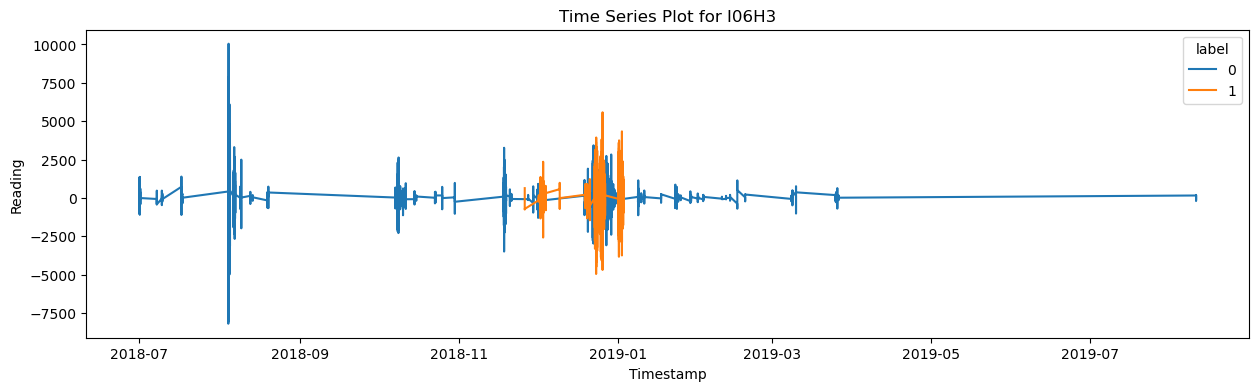

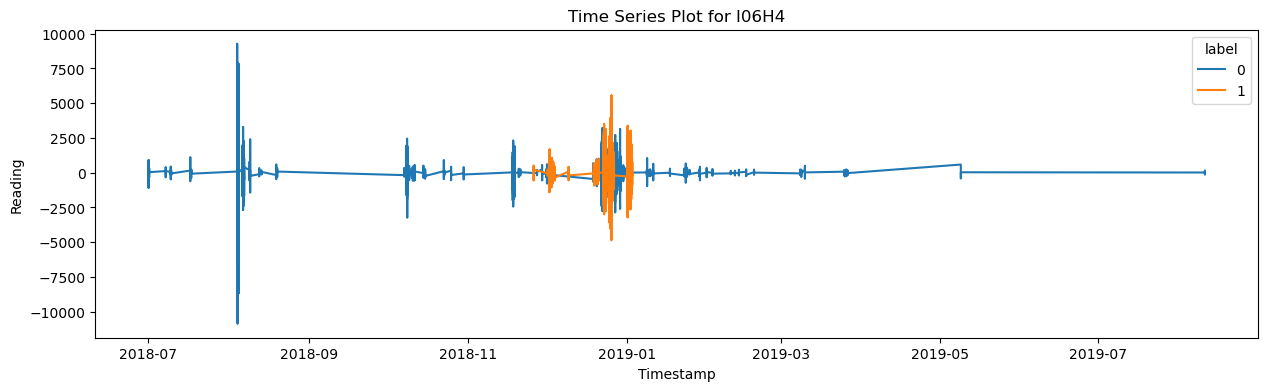

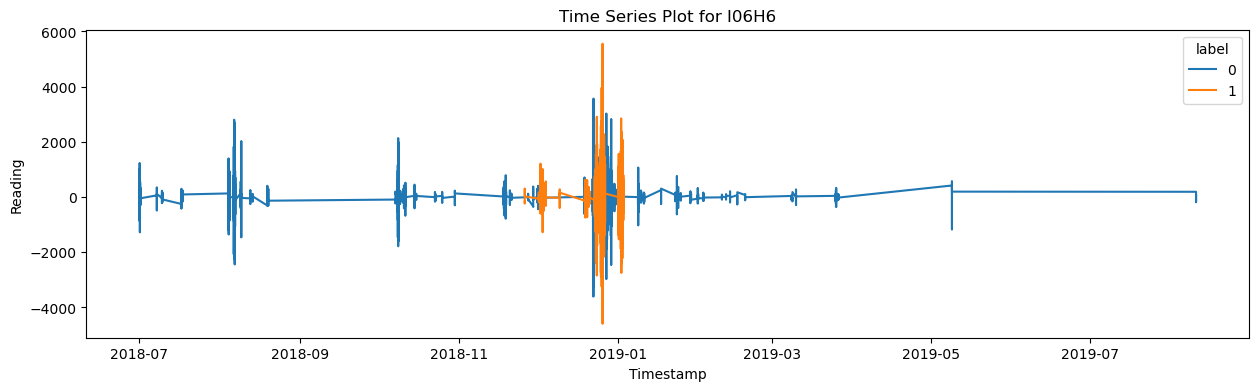

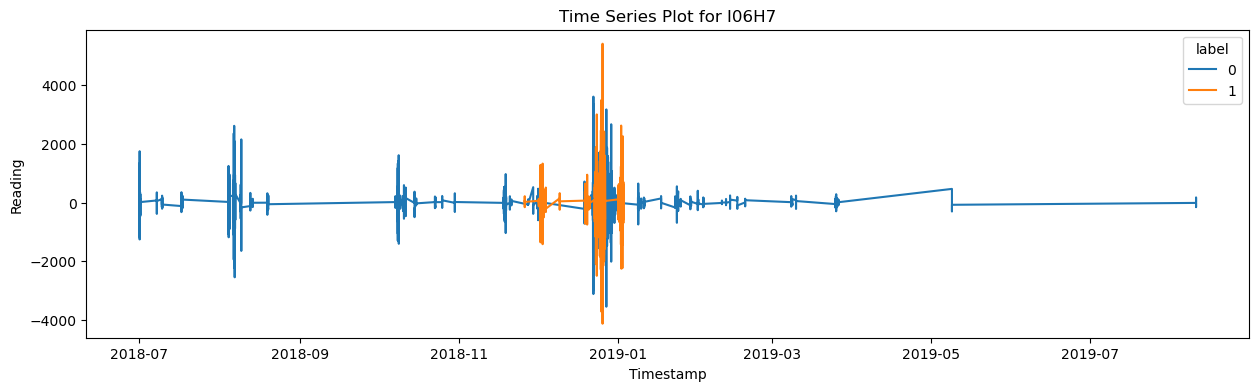

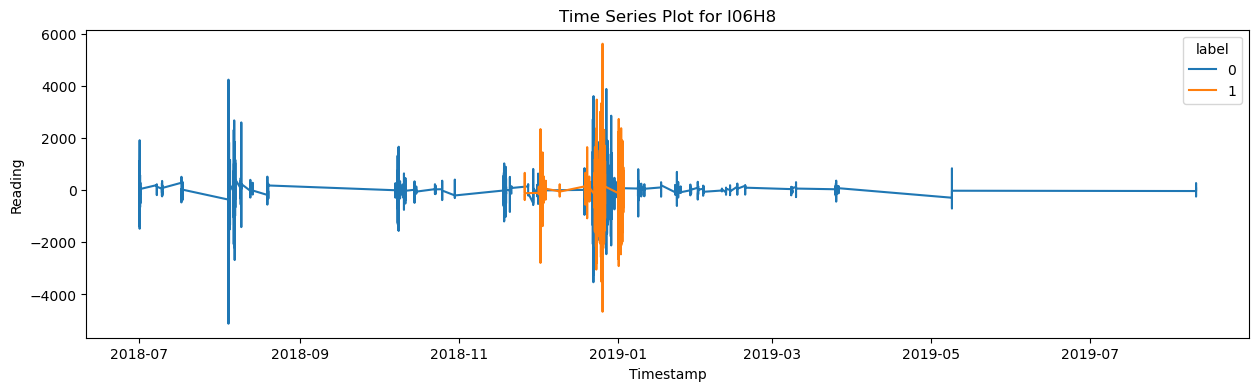

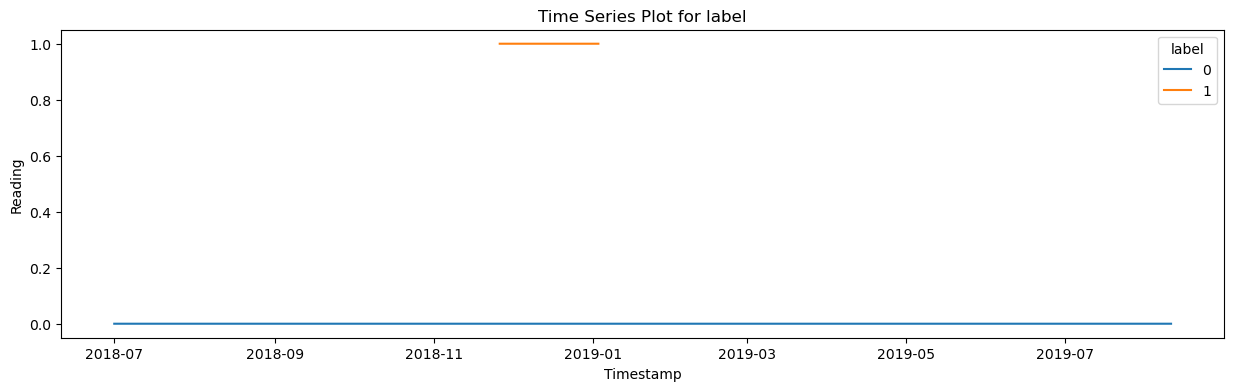

In [20]:
# Time Series Plot for each infrasound station
for column in combined_data.columns[1:-1]:  # Skip timestamp and label columns
    plt.figure(figsize=(15, 4))
    sns.lineplot(x='timestamp', y=column, hue='label', data=combined_data)
    plt.title(f'Time Series Plot for {column}')
    plt.xlabel('Timestamp')
    plt.ylabel('Reading')
    plt.show()

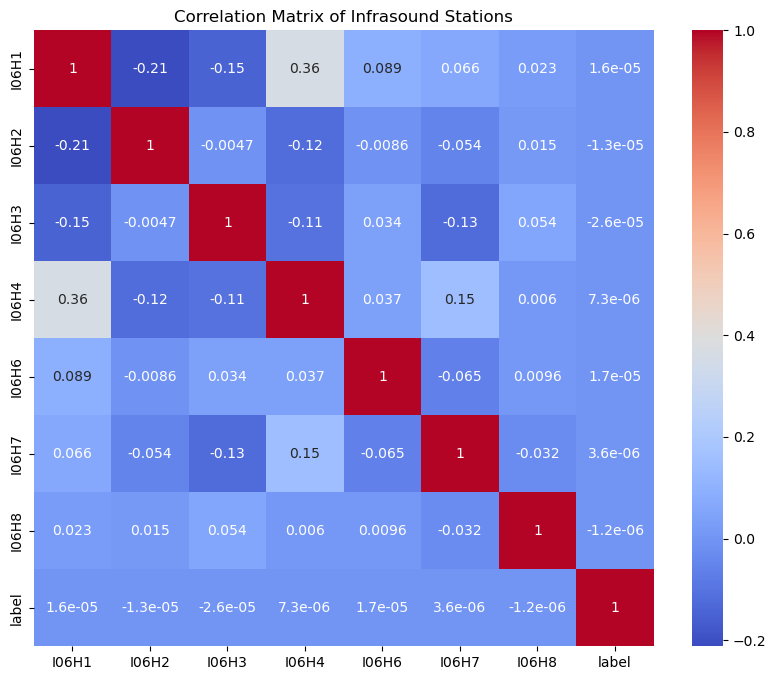

In [21]:
# Correlation Matrix
correlation_matrix = combined_data.iloc[:, 1:-1].corr()  # Exclude timestamp and label
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Infrasound Stations')
plt.show()

In [22]:
# Frequency Analysis (example for one station)
fft_values = fft(combined_data['I06H1'].dropna())
frequencies = np.fft.fftfreq(len(fft_values))
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft_values))
plt.title('Frequency Domain Representation for I06H1')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

KeyError: 'ALIGNED'